In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dependencies.plots import plot_bars, plot_hists


cmap = sns.diverging_palette(0,100,74,39,19,25, center='light', as_cmap=True)
customPal = sns.diverging_palette(100,0,74,39,19,2, center='dark')
sns.set(style="white", palette='RdYlGn_r',font_scale=1.25)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

## Descrição do dataset


__Dicionário__

* **ID**  - Código de identificação do cliente
* **LIMIT_BAL** - Montante do crédito concedido (em dólar): inclui o crédito individual ao consumidor e o crédito à família (complementar).
* **SEX** - Sexo (1 = Masculino, 2 = Feminino)     
* **EDUCATION** - Nível de escolaridade (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)
* **MARRIAGE** - Estado civíl (1 = casado; 2 = solteiro; 3 = outros)
* **AGE** - idade em anos     
* **PAY_0** - Status de pagamento em Setembro de 2019 (-1 = pagamento devidamente; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento por nove meses e acima).  
* **PAY_2** - Status de pagamento em Agosto de 2019   
* **PAY_3** - Status de pagamento em Julho de 2019   
* **PAY_4** - Status de pagamento em Junho de 2019   
* **PAY_5** - Status de pagamento em Maio de 2019  
* **PAY_6** - Status de pagamento em Abril de 2019    
* **BILL_AMT1** - Valor do extrato da fatura (em dólar) em Setembro de 2019
* **BILL_AMT2** - Valor do extrato da fatura (em dólar) em Agosto de 2019
* **BILL_AMT3** - Valor do extrato da fatura (em dólar) em Julho de 2019
* **BILL_AMT4** - Valor do extrato da fatura (em dólar) em Junho de 2019
* **BILL_AMT5** - Valor do extrato da fatura (em dólar) em Maio de 2019
* **BILL_AMT6** - Valor do extrato da fatura (em dólar) em Abril de 2019
* **PAY_AMT1** - Valor do pagamento anterior (em dólar)  em Setembro de 2019
* **PAY_AMT2** - Valor do pagamento anterior (em dólar)  em Agosto de 2019
* **PAY_AMT3** - Valor do pagamento anterior (em dólar)  em Julho de 2019
* **PAY_AMT4** - Valor do pagamento anterior (em dólar)  em Junho de 2019
* **PAY_AMT5** - Valor do pagamento anterior (em dólar)  em Maio de 2019
* **PAY_AMT6** - Valor do pagamento anterior (em dólar)  em Abril de 2019
* **Y** - (0=Não | 1=Sim) Se o cliente é default no mês seguinte (Outubro)

In [2]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_PATH = os.path.join('..','data','interim') 
DATA_INTER_TRAIN_NAME = 'df_train.csv'
DATA_INTER_TRAIN_NAME_2 = 'df_train_1.csv'
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [3]:
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME))

In [4]:
df_train.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,Y
0,50000,1,1,2,28,2,0,0,0,0,0,48508,45951,44013,28094,29138,30625,2500,2000,1200,1500,2000,1500,1
1,120000,2,3,1,51,0,0,0,2,2,2,26496,28586,33828,34236,34734,35292,2800,6000,1200,1300,1200,0,0
2,370000,2,1,2,35,0,0,-2,-1,-1,0,40229,-101,-101,2329,156619,155988,0,0,2430,161450,6035,6439,0
3,30000,1,2,2,30,0,0,0,0,0,0,22221,23248,24260,24743,25261,25763,1391,1403,886,917,922,955,0
4,200000,1,2,1,28,2,2,7,7,7,7,2443,2443,2443,2443,2443,2443,0,0,0,0,0,0,1


Variáveis categóricas serão renomeadas para facilitar a interpretação dos gráficos.

In [5]:
df_train['genero'] = df_train['genero'].replace({1:'masculino', 2:'feminino'})
df_train['educacao'] = df_train['educacao'].replace({1: 'pós-graduação', 2: 'superior', 3: 'ensino médio', 4: 'outros'})
df_train['estado_civil'] = df_train['estado_civil'].replace({1:'casado', 2: 'solteiro', 3: 'outros'})
df_train.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,Y
0,50000,masculino,pós-graduação,solteiro,28,2,0,0,0,0,0,48508,45951,44013,28094,29138,30625,2500,2000,1200,1500,2000,1500,1
1,120000,feminino,ensino médio,casado,51,0,0,0,2,2,2,26496,28586,33828,34236,34734,35292,2800,6000,1200,1300,1200,0,0
2,370000,feminino,pós-graduação,solteiro,35,0,0,-2,-1,-1,0,40229,-101,-101,2329,156619,155988,0,0,2430,161450,6035,6439,0
3,30000,masculino,superior,solteiro,30,0,0,0,0,0,0,22221,23248,24260,24743,25261,25763,1391,1403,886,917,922,955,0
4,200000,masculino,superior,casado,28,2,2,7,7,7,7,2443,2443,2443,2443,2443,2443,0,0,0,0,0,0,1


D:\Dados\Documents\Data Science\Seleçoes\Fortbrasil\Terceira Questão\notebooks\dependencies\plots.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


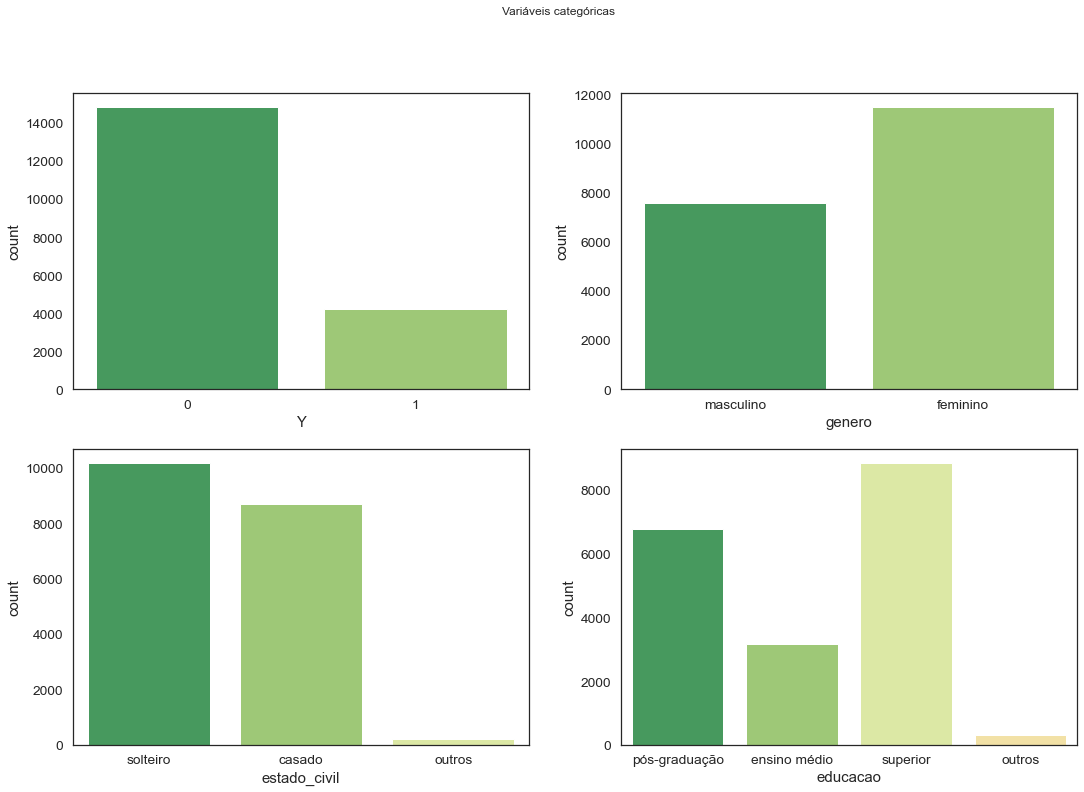

In [6]:
plot_bars(df_train, features=['Y', 'genero', 'estado_civil', 'educacao'], n_rows=2, n_cols=2,
                                          title='Variáveis categóricas', figsize=(18,12))
plt.savefig(os.path.join(IMG_PATH,'bar_plot_cat.png'), format='png')

D:\Dados\Documents\Data Science\Seleçoes\Fortbrasil\Terceira Questão\notebooks\dependencies\plots.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


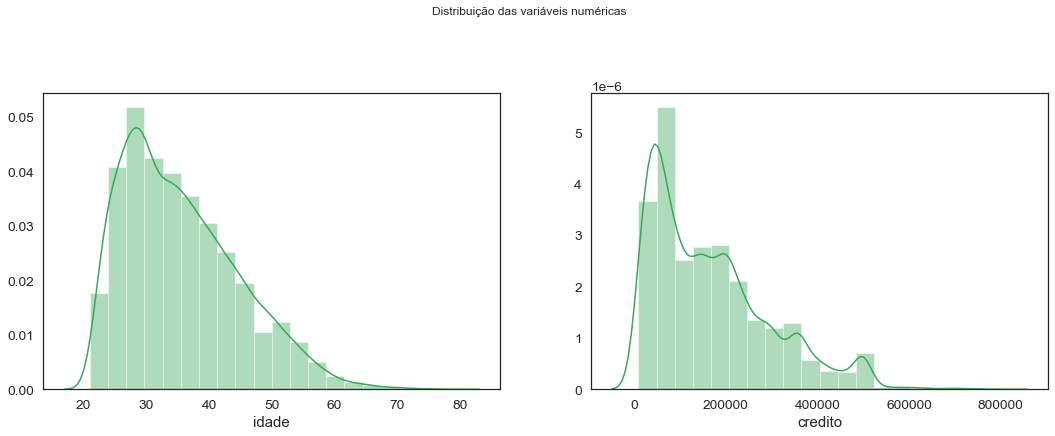

In [7]:
plot_hists(df_train, features=['idade','credito'], n_rows=2, n_cols=2,
                            title='Distribuição das variáveis numéricas', figsize=(18,12))
plt.savefig(os.path.join(IMG_PATH,'Dist_Var_Num.png'), format='png')

In [8]:
df_pgto = df_train[['pgto_set','pgto_ago','pgto_jul','pgto_jun','pgto_mai','pgto_abr']]
df_fatura = df_train[['fatura_set', 'fatura_ago', 'fatura_jul', 'fatura_jun', 'fatura_mai','fatura_abr']]
df_pgto_amt = df_train[['pgto_amt_set','pgto_amt_ago','pgto_amt_jul','pgto_amt_jun','pgto_amt_mai','pgto_amt_abr']]

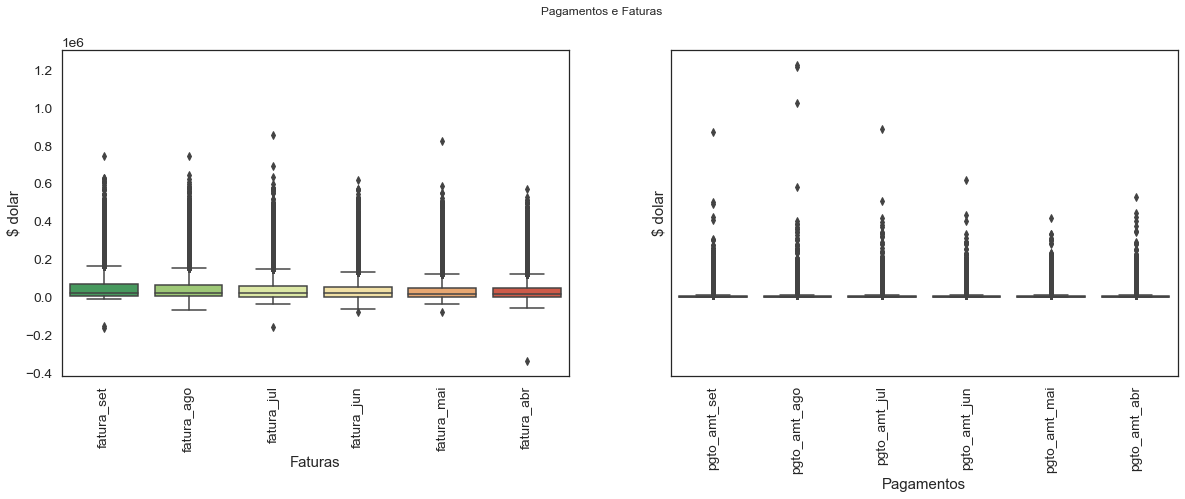

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,6), sharey=True)
sns.boxplot(x="Faturas", y="$ dolar", data=pd.melt(df_fatura, var_name='Faturas', value_name='$ dolar'), ax=ax[0])
sns.boxplot(x="Pagamentos", y="$ dolar", data=pd.melt(df_pgto_amt, var_name='Pagamentos', value_name='$ dolar'), ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90) 
plt.suptitle('Pagamentos e Faturas')
plt.savefig(os.path.join(IMG_PATH,'Pag_Fatura.png'), format='png')
plt.show()

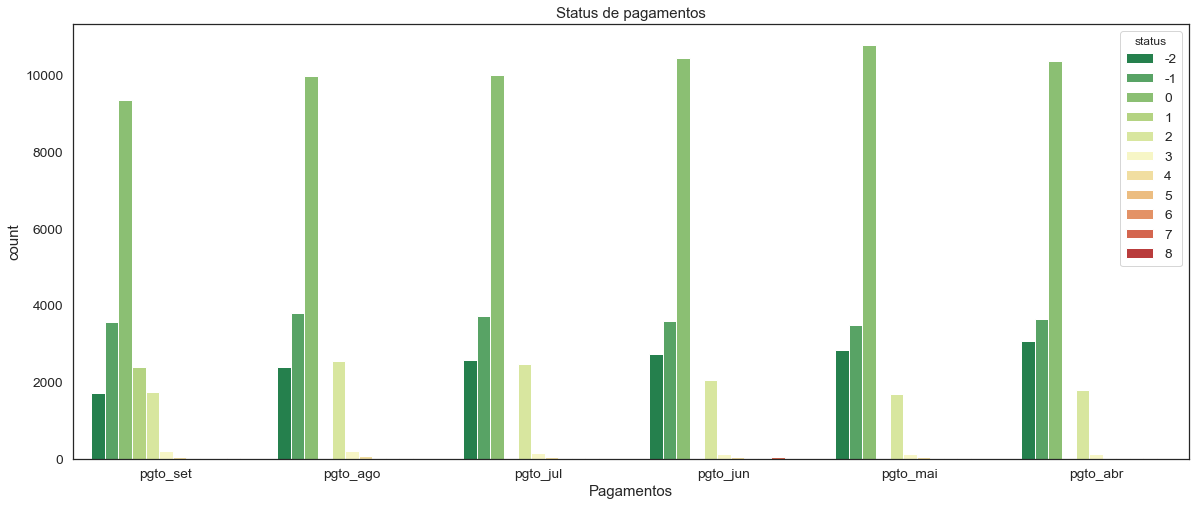

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(x="Pagamentos", hue="status",
              data=pd.melt(df_pgto, var_name='Pagamentos', value_name='status'), palette='RdYlGn_r')
plt.title('Status de pagamentos')
plt.savefig(os.path.join(IMG_PATH,'Pagam_Status.png'), format='png')
plt.show()

__Considerações da análise__

* Foram identificadas muitas faturas com valores negativos, a hipótese inicial é de que o cliente tenha pago acima do valor devido.
* Quanto à distribuição do nível de escolaridade da base, podemos confirmar que a grande maioria está presente nas faixas mais altas. ~82% (22.333) da base tem grau de escolaridade acima do nível _high school_ , equivalente ao ensino médio brasileiro. Apenas ~1,6% (428) tem um nível de escolaridade desconhecido ou abaixo do ensino médio.
* O estado civíl dos clientes encontra-se balanceado, sendo 14.530 clientes solteiros, 12.383 clientes casados e 335 clientes que provavelmente são divorciados ou viúvos;
* A idade dos clientes está entre 21 e 79 anos, no entanto, 75% da base tem abaixo de 41 anos.
* O limite dos clientes varia entre 10.000 e 800.000 dólares, no entanto, apenas 25% dos clientes têm limite acima de 240.000 dólares e apenas 2 clientes na base possui o limite máximo.
* A maioria da base costuma utilizar predominantemente o crédito rotativo. Esse status aparece quando o cliente não é capaz de pagar o valor completo da fatura.
* A média dos valores das faturas vão aumentando ao longo do tempo. Em abril, as faturas eram em média no valor de 39.039 dólares, já no mês de setembro esse número foi para 51.404.
* A média dos valores dos pagamentos oscila entre 4.836 dólares, registrado no mês de junho, até 5.699 dólares, referente ao pagamento mês de setembro.

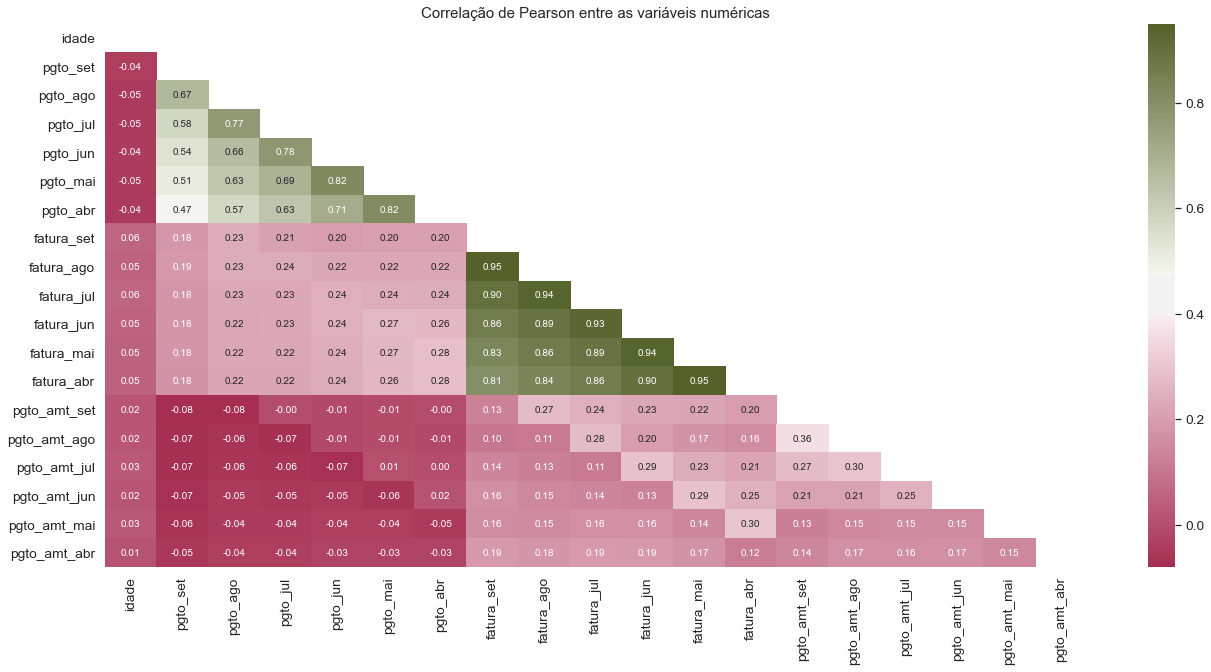

In [11]:
num_feat_corr = df_train.select_dtypes(exclude='object').iloc[:,1:-1].corr()
mask = np.triu(np.ones_like(num_feat_corr, dtype=np.bool))
plt.figure(figsize=(22, 10))
sns.heatmap(num_feat_corr, mask=mask,fmt='.2f', cmap=cmap, annot=True)
plt.title('Correlação de Pearson entre as variáveis numéricas')
plt.savefig(os.path.join(IMG_PATH,'Corr_Pearson.png'), format='png')
plt.show()

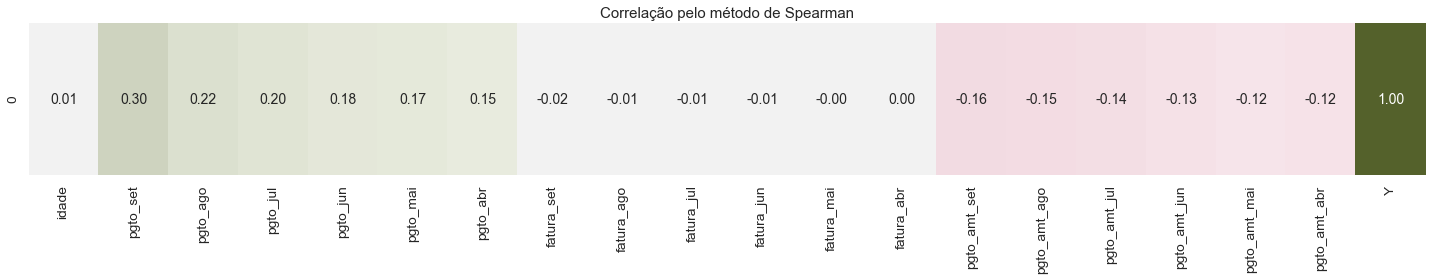

In [12]:
plt.figure(figsize=(20,4))
corrmat = df_train.select_dtypes(exclude='object').iloc[:,1:].corr(method='spearman')
sns.heatmap([corrmat['Y']], xticklabels = corrmat.index,
            annot=True, fmt='.2f', annot_kws={'size': 14},
            cbar=False, center=0, cmap= cmap)
plt.title('Correlação pelo método de Spearman')

plt.tight_layout()
plt.savefig(os.path.join(IMG_PATH,'Corr_Spearman.png'), format='png')
plt.show()

__Chi-square__

$H_0$ : Variável e target são independentes (Não associadas)   
$H_1$: Variável e target não são independentes (São associadas) 

Resultado:

p-valor $\leq \alpha$ : Rejeitar a hipótetse nula ($H_0$), há dependencia entre a variável e o target.   
p-valor > $\alpha$: Não há evidencias suficientes para rejeitar $H_0$, variável e target independentes.

In [18]:
def chisquare(data, target, alpha = 0.05):
    from scipy.stats import chi2, chi2_contingency
    
    features_cat = df_train.select_dtypes(exclude=['float', 'int']).columns
    for feat in features_cat:
        data_crosstab = pd.crosstab (data[feat], data[target], margins = False)
        #Chi-square
        _, p, _, _ = chi2_contingency (data_crosstab)

        #Results    
        if p <= alpha:
            print(f'Há dependencia entre {feat} e {target}. P-valor: {p}')
        else:
            print(f'Não há dependencia entre {feat} e {target}. P-valor: {p}')

def corr_2_cols(Col1, Col2):
    res = df_train.groupby([Col1, Col2]).size().unstack()
    res['frequencia(%)'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [16]:
chisquare(df_train, target = 'Y')

Há dependencia entre credito e Y. P-valor: 3.33483248195291e-89
Há dependencia entre genero e Y. P-valor: 2.020880391058459e-07
Há dependencia entre educacao e Y. P-valor: 4.0939990872871033e-20
Há dependencia entre estado_civil e Y. P-valor: 1.0975082947169626e-05
Há dependencia entre idade e Y. P-valor: 5.889451810605754e-08
Há dependencia entre pgto_set e Y. P-valor: 0.0
Há dependencia entre pgto_ago e Y. P-valor: 0.0
Há dependencia entre pgto_jul e Y. P-valor: 0.0
Há dependencia entre pgto_jun e Y. P-valor: 0.0
Há dependencia entre pgto_mai e Y. P-valor: 0.0
Há dependencia entre pgto_abr e Y. P-valor: 4.003862026848497e-279
Não há dependencia entre fatura_set e Y. P-valor: 0.7143421195785545
Não há dependencia entre fatura_ago e Y. P-valor: 0.7397011016886927
Não há dependencia entre fatura_jul e Y. P-valor: 0.42417049725700945
Não há dependencia entre fatura_jun e Y. P-valor: 0.5880505893516952
Não há dependencia entre fatura_mai e Y. P-valor: 0.6494026961814287
Não há dependencia

In [22]:
#Criando faixas para variáveis numéricas
df_train['limit_bins'] = pd.qcut(df_train['credito'],q=10).astype('str')
df_train['idade_bins'] = pd.qcut(df_train['idade'],q=10).astype('str')
df_train['pgto_amt_set_bins'] = pd.qcut(df_train['pgto_amt_set'],q=10, duplicates='drop').astype('str')

# Bad rate por variável
idade_bins = corr_2_cols(df_train['idade_bins'],df_train['Y'])
limit_bins = corr_2_cols(df_train['limit_bins'], df_train['Y'])
pgto_amt_set_bins = corr_2_cols(df_train['pgto_amt_set_bins'], df_train['Y'])
genero =corr_2_cols(df_train['genero'],df_train['Y']).sort_values('frequencia(%)')
educacao =corr_2_cols(df_train['educacao'],df_train['Y']).sort_values('frequencia(%)')
estado_civil =corr_2_cols(df_train['estado_civil'],df_train['Y']).sort_values('frequencia(%)')

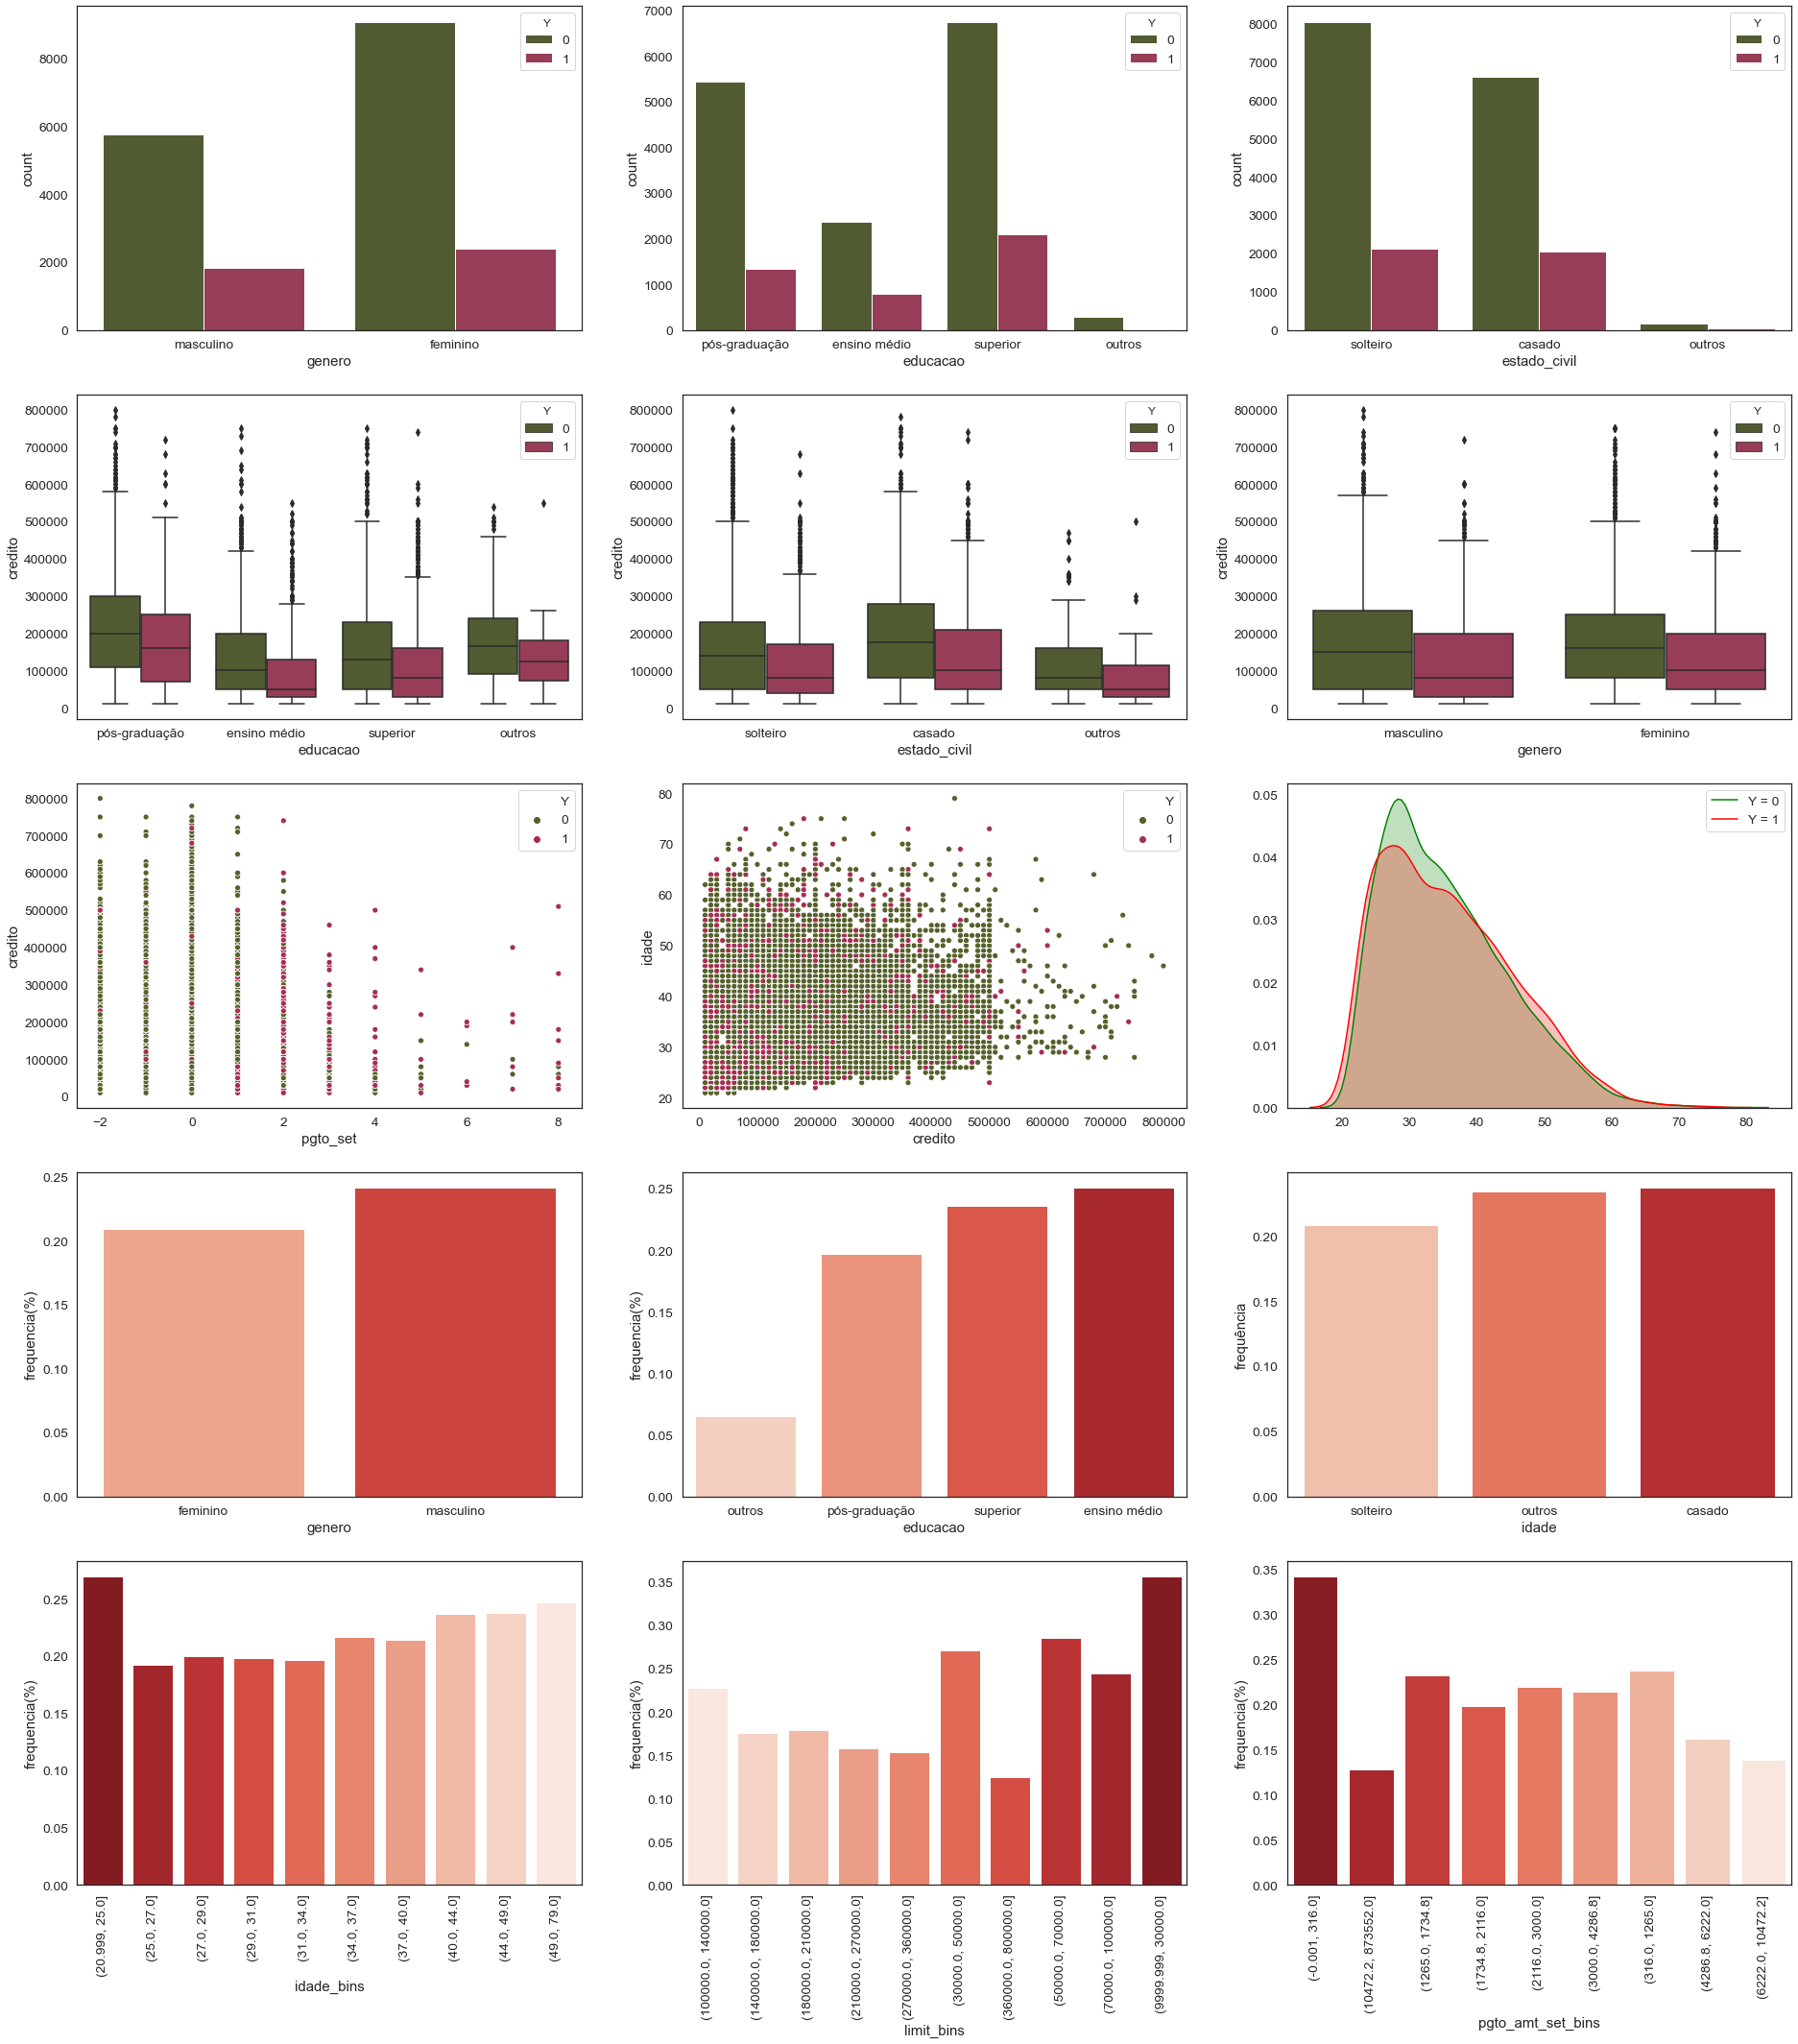

In [32]:
fig,ax = plt.subplots(5,3,figsize=(32,36))
sns.countplot(x='genero', hue='Y', data=df_train, ax=ax[0,0], palette=customPal)
sns.countplot(x='educacao', hue='Y', data=df_train, ax=ax[0,1], palette=customPal)
sns.countplot(x='estado_civil', hue='Y', data=df_train, ax=ax[0,2], palette=customPal)
sns.boxplot(x='educacao', y='credito', hue='Y', data=df_train, ax=ax[1,0], palette=customPal)
sns.boxplot(x='estado_civil', y='credito', hue='Y', data=df_train, ax=ax[1,1], palette=customPal)
sns.boxplot(x='genero', y='credito', hue='Y', data=df_train, ax=ax[1,2], palette=customPal)
sns.scatterplot(y='credito', x='pgto_set',  hue='Y', data=df_train, ax=ax[2,0], palette=customPal)
sns.scatterplot(x='credito', y='idade',  hue='Y', data=df_train, ax=ax[2,1], palette=customPal)
sns.kdeplot(data=df_train[df_train['Y']==0]['idade'], shade=True, label='Y = 0', color='g', ax=ax[2,2] )
sns.kdeplot(data=df_train[df_train['Y']==1]['idade'], shade=True, label='Y = 1', color='r', ax=ax[2,2] )


sns.barplot(data=genero, x=genero.index,y='frequencia(%)', ax=ax[3,0],palette='Reds' )
sns.barplot(data=educacao, x=educacao.index,y='frequencia(%)', ax=ax[3,1],palette='Reds')
sns.barplot(data=estado_civil, x=estado_civil.index,y='frequencia(%)', ax=ax[3,2],palette='Reds')
sns.barplot(data=idade_bins, x=idade_bins.index, y='frequencia(%)', palette='Reds_r', ax=ax[4,0])
sns.barplot(data=limit_bins, x=limit_bins.index, y='frequencia(%)', palette='Reds', ax=ax[4,1])
sns.barplot(data=pgto_amt_set_bins, x=pgto_amt_set_bins.index, y='frequencia(%)', palette='Reds_r', ax=ax[4,2])


# nomeando eixos do kdeplot
ax[3,2].set_xlabel('idade')
ax[3,2].set_ylabel('frequência')

# rotacionando legenda do eixo x
ax[4,0].set_xticklabels(ax[4,0].get_xticklabels(),rotation=90)
ax[4,1].set_xticklabels(ax[4,1].get_xticklabels(),rotation=90) 
ax[4,2].set_xticklabels(ax[4,2].get_xticklabels(),rotation=90)

plt.savefig(os.path.join(IMG_PATH,'Analises.png'), format='png')
plt.show()

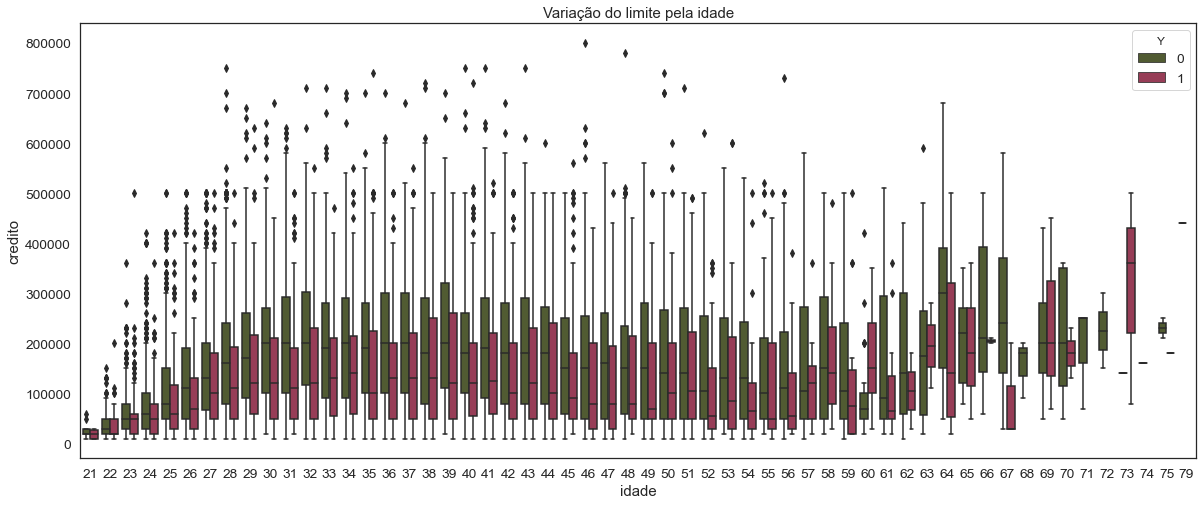

In [33]:
plt.figure(figsize=(20,8))
sns.boxplot(x='idade', y='credito', hue='Y', data=df_train, palette=customPal)
plt.title('Variação do limite pela idade')

plt.savefig(os.path.join(IMG_PATH,'Var_do_limite_p_idade}.png'), format='png')
plt.show()

__Considerações da análise__

* A fatura do mês Abril é paga no mês de Maio, sendo assim, o **BILL_AMT_6** deve ser pago no **PAY_AMT_5**, o **BILL_AMT_5** deve ser pago no **PAY_AMT_4** e assim por diante.
* A correlação de Pearson entre colunas ``fatura`` são altamente correlacionada, o mesmo acontece entre as variáveis de status de pagamento, ``pgto``.
* O teste de chi-square foi utilizado para medir a dependência entre as variaveis categóricas com o target. Os p-valores abaixo de 0,05 reforçam que há dependência entre as variáveis categóricas e o default.
* De modo geral, os limites dos clientes default são inferiores aos limites do clientes não default, embora  essa lógica pareça mudar para clientes com idades nas faixas mais altas, não há volumetria suficiente para concluirmos isso.

In [34]:
df_train['genero'] = df_train['genero'].replace({'masculino':1, 'feminino':2})
df_train['educacao'] = df_train['educacao'].replace({'pós-graduação':1, 'superior':2,  'ensino médio':3, 'outros':4})
df_train['estado_civil'] = df_train['estado_civil'].replace({'casado':1, 'solteiro':2, 'outros':3})

df_train = df_train.drop(['limit_bins', 'idade_bins','pgto_amt_set_bins'], axis=1)

In [35]:
df_train.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,Y
0,50000,1,1,2,28,2,0,0,0,0,0,48508,45951,44013,28094,29138,30625,2500,2000,1200,1500,2000,1500,1
1,120000,2,3,1,51,0,0,0,2,2,2,26496,28586,33828,34236,34734,35292,2800,6000,1200,1300,1200,0,0
2,370000,2,1,2,35,0,0,-2,-1,-1,0,40229,-101,-101,2329,156619,155988,0,0,2430,161450,6035,6439,0
3,30000,1,2,2,30,0,0,0,0,0,0,22221,23248,24260,24743,25261,25763,1391,1403,886,917,922,955,0
4,200000,1,2,1,28,2,2,7,7,7,7,2443,2443,2443,2443,2443,2443,0,0,0,0,0,0,1


In [36]:
df_train.to_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME_2), index=False)